# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

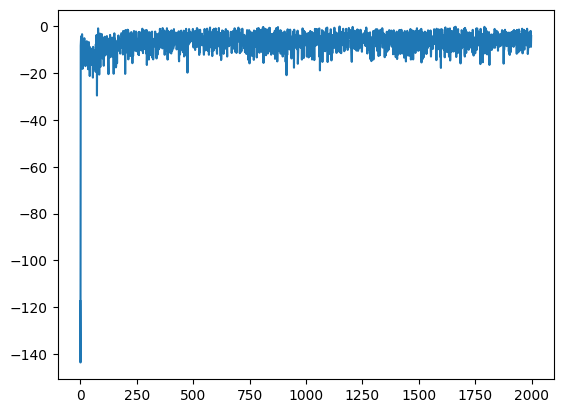

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-117.3560068989592, -143.53695015778112, -8.4136644613463, -5.974827878752087, -4.323370825334167, -6.209278478967768, -6.352995335948208, -12.749663240859247, -3.4560762573738533, -11.73715041126996, -18.251013716392798, -10.07012304606362, -13.971424822493844, -10.00037285924794, -14.196492303011688, -7.936794746238076, -9.702042768733442, -11.8826504869929, -5.164363566624645, -14.17213115162624]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-37.33609585536288, -20.114452234433237, -10.303656414385584, -9.531386606197502, -42.3929490015933, -24.440543622443982, -53.26020619802165, -28.836501024049397, -15.59003135172467, -23.645764520462674, -19.966834921215796, -73.95829236943302, -13.452655914329533, -3.51468381307583, -47.495588471897776, -62.08227471933667, -5.078060455030822, -17.201418510940783, -73.37329706651359, -7.903092431550479]


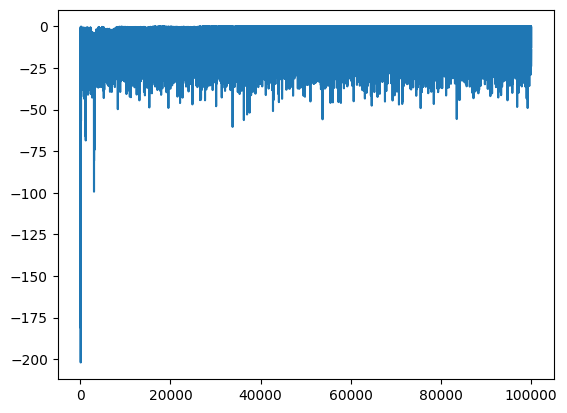

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

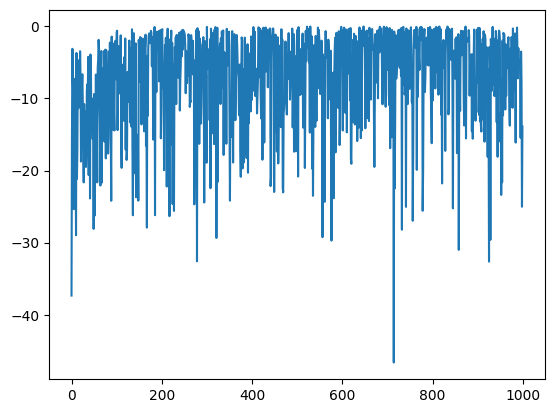

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

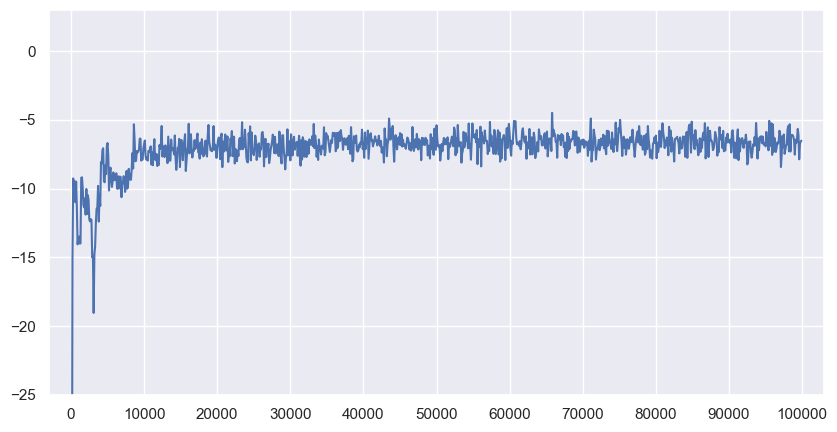

In [11]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-25,3)

plt.savefig("score_simple_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -42.92497
dtype: float64